# Transitioning from Simple to Multiple Linear Regression 

## Importing Relevant Libraries!

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sy
from scipy import stats  
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

## __THIS USES THE HYPERTENSION.CSV datasets__
__Is blood pressure related to age? Or weight? Or hypertension? Or all of them? This example goes through the process of transitioning from simple to multiple linear regression.__

In [40]:
#Importing the dataset.
hypertension=pd.read_csv('Hypertension.csv')
hypertension

,Pt,BP,Age,Weight,Dur
0,1,105,47,85.4,5.1
1,2,115,49,94.2,3.8
2,3,116,49,95.3,8.2
3,4,117,50,94.7,5.8
4,5,112,51,89.4,7.0
5,6,121,48,99.5,9.3
6,7,121,49,99.8,2.5
7,8,110,47,90.9,6.2
8,9,110,49,89.2,7.1
9,10,114,48,92.7,5.6


<AxesSubplot:xlabel='Age', ylabel='BP'>

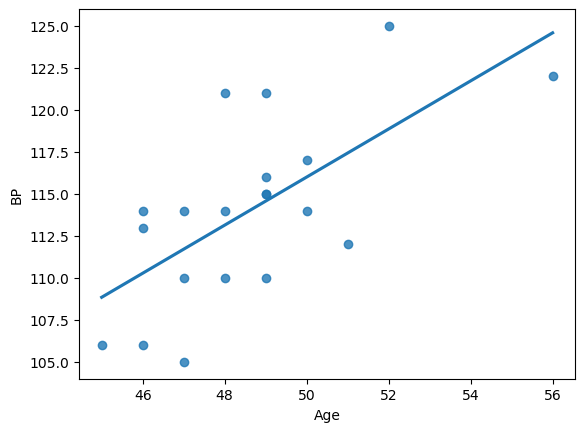

In [41]:
#Regression plot of age vs. blood pressure

sns.regplot(x='Age',y='BP',data=hypertension,ci=None)

<AxesSubplot:xlabel='Weight', ylabel='BP'>

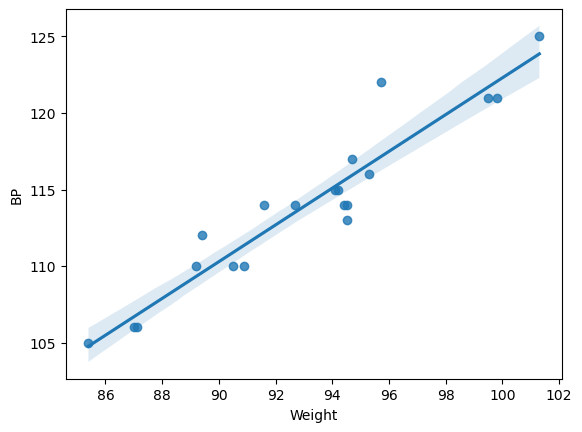

In [44]:
#Regression plot of weight vs. blood pressure

sns.regplot(x='Weight',y='BP',data=hypertension,ci=95)

<AxesSubplot:xlabel='Dur', ylabel='BP'>

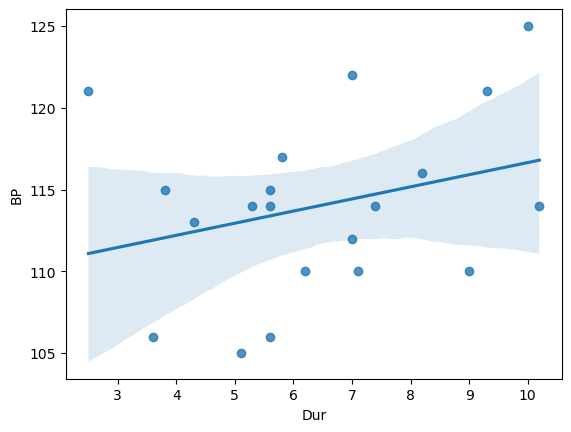

In [28]:
#Regression plot of age vs. blood pressure

sns.regplot(x='Dur',y='BP',data=hypertension,ci=95)

In [45]:
#Simple linear regression model of age and blood pressure

model1=ols('BP~Age',data=hypertension)
results1=model1.fit()
print(results1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.403   
Dependent Variable: BP               AIC:                116.0041
Date:               2023-10-30 17:08 BIC:                117.9956
No. Observations:   20               Log-Likelihood:     -56.002 
Df Model:           1                F-statistic:        13.82   
Df Residuals:       18               Prob (F-statistic): 0.00157 
R-squared:          0.434            Scale:              17.596  
-------------------------------------------------------------------
             Coef.    Std.Err.     t      P>|t|    [0.025    0.975]
-------------------------------------------------------------------
Intercept   44.4545    18.7277   2.3737   0.0289   5.1091   83.8000
Age          1.4310     0.3849   3.7182   0.0016   0.6224    2.2395
-----------------------------------------------------------------
Omnibus:              0.767        Durbin-Watson:           1.965
Prob(Omnibus):   

In [46]:
#Simple linear regression model of weight and blood pressure

model2=ols('BP~Weight',data=hypertension)
results2=model2.fit()
print(results2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.897   
Dependent Variable: BP               AIC:                80.8172 
Date:               2023-10-30 17:08 BIC:                82.8087 
No. Observations:   20               Log-Likelihood:     -38.409 
Df Model:           1                F-statistic:        166.9   
Df Residuals:       18               Prob (F-statistic): 1.53e-10
R-squared:          0.903            Scale:              3.0293  
------------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept     2.2053    8.6633   0.2546  0.8020  -15.9957  20.4063
Weight        1.2009    0.0930  12.9174  0.0000    1.0056   1.3963
-----------------------------------------------------------------
Omnibus:              9.231        Durbin-Watson:           1.641
Prob(Omnibus):        

In [47]:
#Simple linear regression model of hyper tension and blood pressure. Slope coefficient spans 0, likely not significant.

model3=ols('BP~Dur',data=hypertension)
results3=model3.fit()
print(results3.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.035   
Dependent Variable: BP               AIC:                125.6086
Date:               2023-10-30 17:08 BIC:                127.6000
No. Observations:   20               Log-Likelihood:     -60.804 
Df Model:           1                F-statistic:        1.688   
Df Residuals:       18               Prob (F-statistic): 0.210   
R-squared:          0.086            Scale:              28.443  
------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
Intercept  109.2350    3.8563  28.3265  0.0000  101.1332  117.3367
Dur          0.7411    0.5703   1.2993  0.2102   -0.4572    1.9393
-----------------------------------------------------------------
Omnibus:              0.757        Durbin-Watson:           2.199
Prob(Omnibus):        

## Generate residual plots
We need to generate residual plots of BP vs. age/weight/hypertension to ensure that all assumptions of linear regression are met.

<AxesSubplot:xlabel='Age', ylabel='BP'>

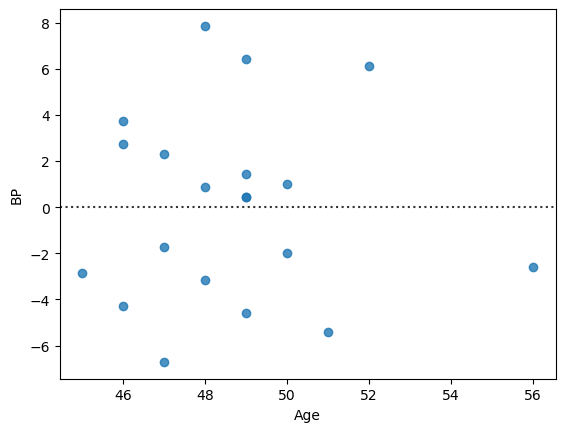

In [48]:
#Residual plot of Age and BP

sns.residplot(x='Age',y='BP',data=hypertension)

<AxesSubplot:xlabel='Weight', ylabel='BP'>

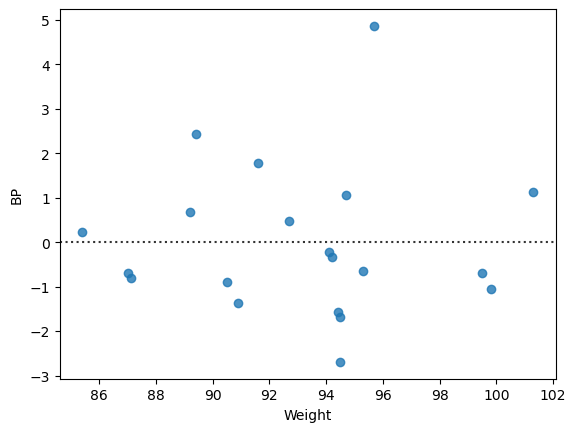

In [49]:
#Residual plot of Weight and BP

sns.residplot(x='Weight',y='BP',data=hypertension)

<AxesSubplot:xlabel='Dur', ylabel='BP'>

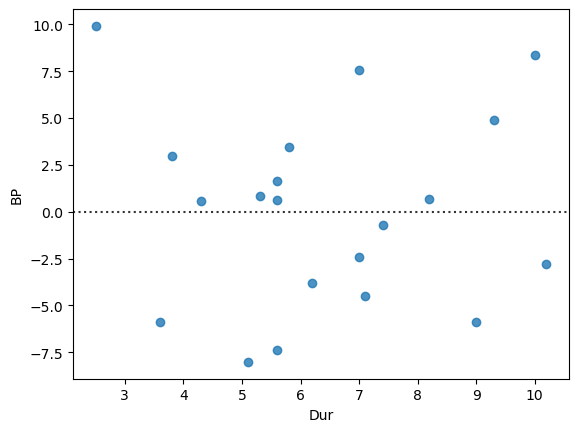

In [50]:
#Residual plot of Hypertension and BP

sns.residplot(x='Dur',y='BP',data=hypertension)

Text(0, 0.5, 'resdiuals from BP~Age')

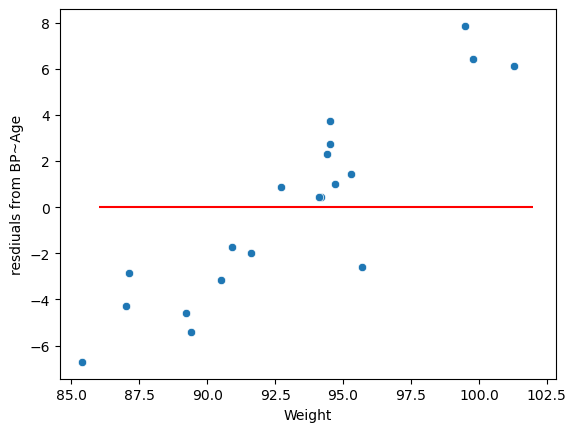

In [51]:
#Plotting residuals of BP~Age vs. weight shows a linear pattern. Something is left on the table.

sns.scatterplot(x=hypertension["Weight"],y=results1.resid)
plt.hlines(0,86,102,color='red')
plt.ylabel("resdiuals from BP~Age")

## Multiple factors
__Blood pressure appears positively correlated with age and weight with minimal correlation with hypertension. New model is made using both age + weight as factors__
ols('BP~Age+Weight', data=hypertension)

In [54]:
model4=ols('BP~Age+Weight',data=hypertension)
results4=model4.fit()
print(results4.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.990   
Dependent Variable: BP               AIC:                34.3147 
Date:               2023-10-30 17:09 BIC:                37.3019 
No. Observations:   20               Log-Likelihood:     -14.157 
Df Model:           2                F-statistic:        978.2   
Df Residuals:       17               Prob (F-statistic): 2.81e-18
R-squared:          0.991            Scale:              0.28376 
------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
Intercept  -16.5794    3.0075  -5.5128  0.0000  -22.9246  -10.2342
Age          0.7083    0.0535  13.2349  0.0000    0.5953    0.8212
Weight       1.0330    0.0312  33.1542  0.0000    0.9672    1.0987
-----------------------------------------------------------------
Omnibus:             

## Examine residuals of new model
Residuals show no pattern with duration. We do not need to add hypertension duration to the model.

Text(0, 0.5, 'resdiuals from BP~Age+Weight')

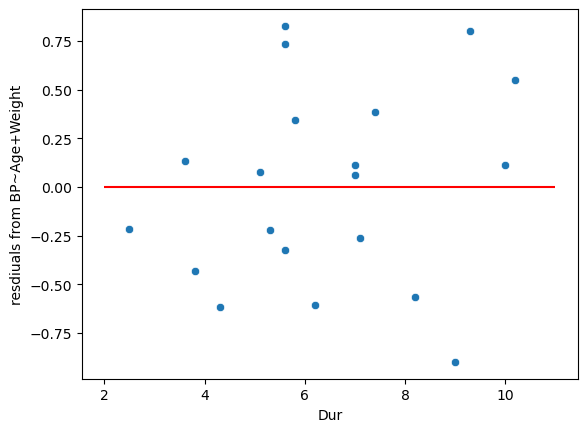

In [37]:
sns.scatterplot(x=hypertension["Dur"],y=results4.resid)
plt.hlines(0,2,11,color='red')
plt.ylabel("resdiuals from BP~Age+Weight")

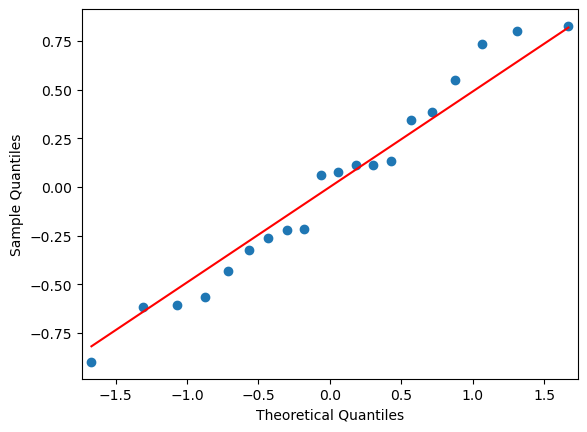

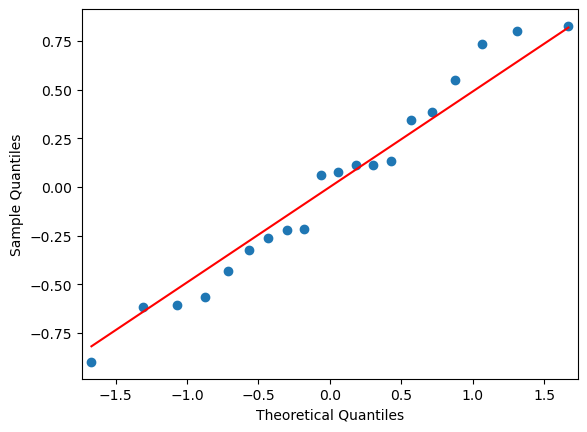

In [38]:
sm.qqplot(results4.resid,line='s')